**Q1. Problem Statement: Dimensionality Reduction** <br>
Write a Python program that reads the dairy_product.csv (provided on LMS) file into a
DataFrame, the following are the tasks that are to be taken into consideration while
reducing the dimensions of data.
1.	Load the mobile dairy_product.csv data into a DataFrame
2.	Find missing value and drop columns having more than 80% missing data
3.	Do label encoding for categorical features
4.	Extract independent variables (Xs) and dependent variables (Ys) into separate data objects and drop unwanted columns like “ID”
5.	Print low variance data
6.	Use random forest and print important features as per their value
7.	Based on high correlation drop highly correlated columns much as you can 	find.


**Step 1:** Import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Step 2:** Load given csv file into dataframe

In [ ]:
df = pd.read_csv('/content/sample_data/dairy_product.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [ ]:
df.shape

(8618, 45)

**Step 3:** Missing value analysis.

In [ ]:
df.isna().sum()/len(df)*100 # drop missing value columns

ID                   0.000000
FoodGroup            0.000000
ShortDescrip         0.000000
Descrip              0.000000
CommonName          87.665352
MfgName             81.898352
ScientificName      91.506150
Energy_kcal          0.000000
Protein_g            0.000000
Fat_g                0.000000
Carb_g               0.000000
Sugar_g              0.000000
Fiber_g              0.000000
VitA_mcg             0.000000
VitB6_mg             0.000000
VitB12_mcg           0.000000
VitC_mg              0.000000
VitE_mg              0.000000
Folate_mcg           0.000000
Niacin_mg            0.000000
Riboflavin_mg        0.000000
Thiamin_mg           0.000000
Calcium_mg           0.000000
Copper_mcg           0.000000
Iron_mg              0.000000
Magnesium_mg         0.000000
Manganese_mg         0.000000
Phosphorus_mg        0.000000
Selenium_mcg         0.000000
Zinc_mg              0.000000
VitA_USRDA           0.000000
VitB6_USRDA          0.000000
VitB12_USRDA         0.000000
VitC_USRDA

**Step 4:** Drop unwanted columns.

In [ ]:
df = df.drop(columns = ['CommonName', 'MfgName','ScientificName'],axis =1 )
# we are dropping these columns because it contain more than 85% missing data which is hard to fill missing gap.

In [ ]:
df.describe(include= "object")

,FoodGroup,ShortDescrip,Descrip
count,8618,8618,8618
unique,25,8614,8618
top,Beef Products,"BEEF,CHUCK,UNDER BLADE CNTR STEAK,BNLESS,DENVE...","Butter, salted"
freq,946,2,1


**Step 5:** Do label encoding for catagorical features.

In [ ]:
#convert all catagorical data to numeric
catagorical = df.select_dtypes(include="object").columns
cat = ['FoodGroup', 'ShortDescrip', 'Descrip']
catagorical

Index(['FoodGroup', 'ShortDescrip', 'Descrip'], dtype='object')

In [ ]:
cat

['FoodGroup', 'ShortDescrip', 'Descrip']

In [ ]:
from sklearn import preprocessing
# we need to replce age bracate with labes
le = preprocessing.LabelEncoder()
df['FoodGroup'] = le.fit_transform(df['FoodGroup'].values)


In [ ]:
df['ShortDescrip'] = le.fit_transform(df['ShortDescrip'].values)
df['Descrip'] = le.fit_transform(df['Descrip'].values)


In [ ]:
# ditribute x and y
x = df.drop(["ID","FoodGroup"],axis = 1)
y = df.FoodGroup

In [ ]:
#missing value
x.isnull().sum()*100/len(x) # no missing value found

ShortDescrip        0.0
Descrip             0.0
Energy_kcal         0.0
Protein_g           0.0
Fat_g               0.0
Carb_g              0.0
Sugar_g             0.0
Fiber_g             0.0
VitA_mcg            0.0
VitB6_mg            0.0
VitB12_mcg          0.0
VitC_mg             0.0
VitE_mg             0.0
Folate_mcg          0.0
Niacin_mg           0.0
Riboflavin_mg       0.0
Thiamin_mg          0.0
Calcium_mg          0.0
Copper_mcg          0.0
Iron_mg             0.0
Magnesium_mg        0.0
Manganese_mg        0.0
Phosphorus_mg       0.0
Selenium_mcg        0.0
Zinc_mg             0.0
VitA_USRDA          0.0
VitB6_USRDA         0.0
VitB12_USRDA        0.0
VitC_USRDA          0.0
VitE_USRDA          0.0
Folate_USRDA        0.0
Niacin_USRDA        0.0
Riboflavin_USRDA    0.0
Thiamin_USRDA       0.0
Calcium_USRDA       0.0
Copper_USRDA        0.0
Magnesium_USRDA     0.0
Phosphorus_USRDA    0.0
Selenium_USRDA      0.0
Zinc_USRDA          0.0
dtype: float64

In [ ]:
x.shape

(8618, 40)

In [ ]:
x_orig = x.copy()

**Step 7:** Low Variance Filter

In [ ]:
x.var()

<ipython-input-20-6afbf7ba6597>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.var()


ShortDescrip        6.185080e+06
Energy_kcal         2.869260e+04
Protein_g           1.113149e+02
Fat_g               2.517411e+02
Carb_g              7.419631e+02
Sugar_g             1.850171e+02
Fiber_g             1.860775e+01
VitA_mcg            6.074054e+05
VitB6_mg            2.290714e-01
VitB12_mcg          1.865534e+01
VitC_mg             3.315774e+03
VitE_mg             1.481502e+01
Folate_mcg          3.480488e+04
Niacin_mg           2.337308e+01
Riboflavin_mg       2.023920e-01
Thiamin_mg          2.687065e-01
Calcium_mg          4.054732e+04
Copper_mcg          3.058670e-01
Iron_mg             3.279815e+01
Magnesium_mg        3.143672e+03
Manganese_mg        4.074828e+01
Phosphorus_mg       4.124686e+04
Selenium_mcg        8.004569e+02
Zinc_mg             1.127759e+01
VitA_USRDA          7.498833e-01
VitB6_USRDA         7.926347e-02
VitB12_USRDA        3.238774e+00
VitC_USRDA          4.093548e-01
VitE_USRDA          6.584452e-02
Folate_USRDA        2.175305e-01
Niacin_USR

In [ ]:
x_v = x/x.mean()
x_v.var()

<ipython-input-21-4ef08981a14c>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_v = x/x.mean()


Calcium_USRDA         7.523775
Calcium_mg            7.523775
Carb_g                1.558512
Copper_USRDA         10.317163
Copper_mcg           10.317163
Descrip                    NaN
Energy_kcal           0.559589
Fat_g                 2.220740
Fiber_g               4.545673
Folate_USRDA         13.753041
Folate_mcg           13.753041
Iron_mg               4.509842
Magnesium_USRDA       2.931833
Magnesium_mg          2.931833
Manganese_mg        160.136991
Niacin_USRDA          2.008214
Niacin_mg             2.008214
Phosphorus_USRDA      1.695188
Phosphorus_mg         1.695188
Protein_g             0.838212
Riboflavin_USRDA      3.595733
Riboflavin_mg         3.595733
Selenium_USRDA        5.029991
Selenium_mcg          5.029991
ShortDescrip          0.333575
Sugar_g               4.299032
Thiamin_USRDA         6.101428
Thiamin_mg            6.101428
VitA_USRDA           68.787804
VitA_mcg             68.787804
VitB12_USRDA         12.426439
VitB12_mcg           12.426439
VitB6_US

In [ ]:
x_v.var()>0.03

Calcium_USRDA        True
Calcium_mg           True
Carb_g               True
Copper_USRDA         True
Copper_mcg           True
Descrip             False
Energy_kcal          True
Fat_g                True
Fiber_g              True
Folate_USRDA         True
Folate_mcg           True
Iron_mg              True
Magnesium_USRDA      True
Magnesium_mg         True
Manganese_mg         True
Niacin_USRDA         True
Niacin_mg            True
Phosphorus_USRDA     True
Phosphorus_mg        True
Protein_g            True
Riboflavin_USRDA     True
Riboflavin_mg        True
Selenium_USRDA       True
Selenium_mcg         True
ShortDescrip         True
Sugar_g              True
Thiamin_USRDA        True
Thiamin_mg           True
VitA_USRDA           True
VitA_mcg             True
VitB12_USRDA         True
VitB12_mcg           True
VitB6_USRDA          True
VitB6_mg             True
VitC_USRDA           True
VitC_mg              True
VitE_USRDA           True
VitE_mg              True
Zinc_USRDA  

In [ ]:
x = x.loc[:,x_v.var()>0.03] # columns having morehan 0.03 variance will be printed only
x.shape

(8618, 39)

**Step 8:** Build random forest model and extract important fetures

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 29)
# we are using random forest to find out most importtrant features.
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.feature_importances_

array([0.09043869, 0.04264697, 0.04704544, 0.04204564, 0.0697399 ,
       0.02532013, 0.02671315, 0.01176939, 0.02144897, 0.02530817,
       0.0208061 , 0.011802  , 0.02029926, 0.02452747, 0.01634017,
       0.02809624, 0.01977878, 0.01790132, 0.02837062, 0.02025887,
       0.02719383, 0.01639549, 0.02157243, 0.03079334, 0.0130748 ,
       0.01940365, 0.02159035, 0.02140248, 0.01202839, 0.01851661,
       0.0223388 , 0.01600696, 0.02775398, 0.01892457, 0.01587652,
       0.01821923, 0.01718693, 0.02226536, 0.028799  ])

In [ ]:
rf_feat = pd.Series(rf.feature_importances_, index= x_train.columns)
rf_feat # feature importance based on their score

ShortDescrip        0.090439
Energy_kcal         0.042647
Protein_g           0.047045
Fat_g               0.042046
Carb_g              0.069740
Sugar_g             0.025320
Fiber_g             0.026713
VitA_mcg            0.011769
VitB6_mg            0.021449
VitB12_mcg          0.025308
VitC_mg             0.020806
VitE_mg             0.011802
Folate_mcg          0.020299
Niacin_mg           0.024527
Riboflavin_mg       0.016340
Thiamin_mg          0.028096
Calcium_mg          0.019779
Copper_mcg          0.017901
Iron_mg             0.028371
Magnesium_mg        0.020259
Manganese_mg        0.027194
Phosphorus_mg       0.016395
Selenium_mcg        0.021572
Zinc_mg             0.030793
VitA_USRDA          0.013075
VitB6_USRDA         0.019404
VitB12_USRDA        0.021590
VitC_USRDA          0.021402
VitE_USRDA          0.012028
Folate_USRDA        0.018517
Niacin_USRDA        0.022339
Riboflavin_USRDA    0.016007
Thiamin_USRDA       0.027754
Calcium_USRDA       0.018925
Copper_USRDA  

In [ ]:
x = x.loc[:, rf_feat>0.01]
x.shape

(8618, 39)

**Step 9:** Correlation Filter

In [ ]:
x_cor = x.corr()>0.8

In [ ]:
x_cor

,ShortDescrip,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
ShortDescrip,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Energy_kcal,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Protein_g,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Fat_g,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Carb_g,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Sugar_g,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Fiber_g,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
VitA_mcg,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
VitB6_mg,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
VitB12_mcg,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
x_cor_cols = ['ShortDescrip', 'Descrip', 'Energy_kcal', 'Protein_g', 'Fat_g',
       'Carb_g', 'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg',
       'VitC_mg', 'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg',
       'Thiamin_mg', 'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg',
       'Manganese_mg', 'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg',
       'VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA',
       'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA',
       'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA',
       'Selenium_USRDA', 'Zinc_USRDA']

In [ ]:
x_cor['ShortDescrip']

ShortDescrip         True
Energy_kcal         False
Protein_g           False
Fat_g               False
Carb_g              False
Sugar_g             False
Fiber_g             False
VitA_mcg            False
VitB6_mg            False
VitB12_mcg          False
VitC_mg             False
VitE_mg             False
Folate_mcg          False
Niacin_mg           False
Riboflavin_mg       False
Thiamin_mg          False
Calcium_mg          False
Copper_mcg          False
Iron_mg             False
Magnesium_mg        False
Manganese_mg        False
Phosphorus_mg       False
Selenium_mcg        False
Zinc_mg             False
VitA_USRDA          False
VitB6_USRDA         False
VitB12_USRDA        False
VitC_USRDA          False
VitE_USRDA          False
Folate_USRDA        False
Niacin_USRDA        False
Riboflavin_USRDA    False
Thiamin_USRDA       False
Calcium_USRDA       False
Copper_USRDA        False
Magnesium_USRDA     False
Phosphorus_USRDA    False
Selenium_USRDA      False
Zinc_USRDA  

**Step 10:** Drop corelated columns

In [ ]:
# drop who ever is true for ShortDescrip
# If we want to reduce
#x = x.drop(['Descrip'], axis=1)
print("final shape of dataFrame is",x.shape)

final shape of dataFrame is (8618, 39)


**Conclusion**: In the start  we had 45 features out of that we reduced to 39.

**Q2. Problem Statement: Linear Discriminant Analysis**<br>
1.	Use the above-separated data of X and Y
2.	Standardizes the data
3.	Perform LDA
4.	Plot the graph of LDA for Test data
5.	Build a Random forest model and evaluate your data


**Step 1:** Split data into train and test

In [ ]:
#Training & testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Step 2:** Perform feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Step 3:** Perfom LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

LinearDiscriminantAnalysis class is imported as LDA. Like PCA, we have to pass the value for the n_components parameter of the LDA, which refers to the number of linear discriminates that we want to retrieve. In this case we set the n_components to 1, since we first want to check the performance of our classifier with a single linear discriminant. Finally we execute the fit and transform methods to actually retrieve the linear discriminants.

Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. However in the case of PCA, the transform method only requires one parameter i.e. X_train. This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants, while PCA doesn't depend upon the output labels.

**Step 4:** Plot the graph

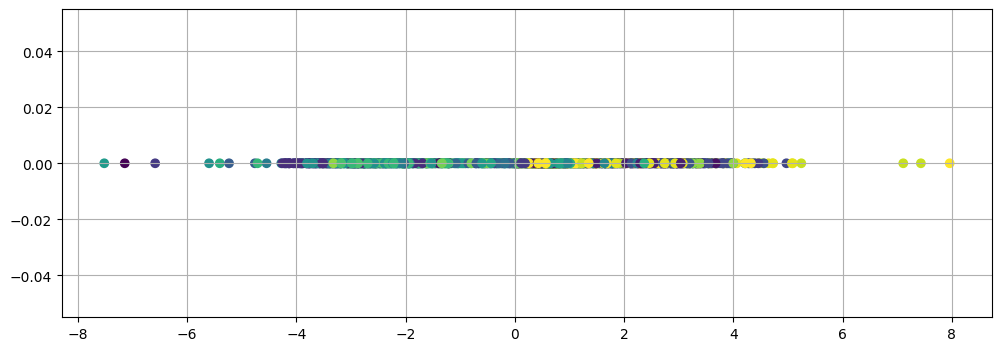

In [ ]:
plt.figure(figsize=(12,4))
plt.scatter(X_test, np.zeros(len(X_test)), c=y_test)
plt.grid()
plt.show()

**Step 5:** Training & Testing the data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

**Step 6:** Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

Accuracy: 0.22621809744779584
